In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from hmm_discretization import Discrete_Model_Optimization
from torch.distributions import MultivariateNormal
from tqdm import tqdm

In [17]:
# 2 Hidden States
means2 = np.array([
    [1.0, 4.0], [5.0, -3.0]
    ])
covars2 = np.array([
    [[1.0, 0.0], [0.0, 1.0]],
    [[1.0, 0.5], [0.5, 1.0]]
    ])
startprob2 = np.array([0.5, 0.5])
transmat2 = np.array([[0.2, 0.8], [0.5, 0.5]])

# 3 Hidden States
means3 = np.array([
    [1.0, 4.0], [5.0, -3.0], [-3.0, -4.0]
    ])
covars3 = np.array([
    [[1.0, 0.0], [0.0, 1.0]],
    [[1.0, 0.5], [0.5, 1.0]],
    [[1.5, 1.0], [1.0, 1.5]]
    ])
startprob3 = np.array([0.5, 0.2, 0.3])
transmat3 = np.array([[0.2, 0.6, 0.2], [0.5, 0.4, 0.1], [0.15, 0.35, 0.5]])

In [18]:
n_hidden = 3
n_dimensions = 2
n_components = n_hidden
n_features = n_components
sample_size = 500
grid_size = 2 ** 6
disc_method = 'random'
lr = 0.01
n_epochs = 200
random_init = False
loss_functions = 'KLD'
if n_hidden == 2:
    STARTPROB = startprob2
    TRANSMAT = transmat2
    MEANS = means2
    COVARS = covars2

elif n_hidden == 3:
    STARTPROB = startprob3
    TRANSMAT = transmat3
    MEANS = means3
    COVARS = covars3
else:
    print("Please choose another number of hidden states")

mod_opt = Discrete_Model_Optimization(n_components,
                                        n_features,
                                        n_dimensions,
                                        sample_size,
                                        grid_size,
                                        disc_method,
                                        lr,
                                        n_epochs,
                                        STARTPROB,
                                        TRANSMAT,
                                        MEANS,
                                        COVARS,
                                        random_init)

In [40]:
obs, distr = mod_opt.sample(15000)

In [59]:
covars3[:, 0]

array([[1. , 0. ],
       [1. , 0.5],
       [1.5, 1. ]])

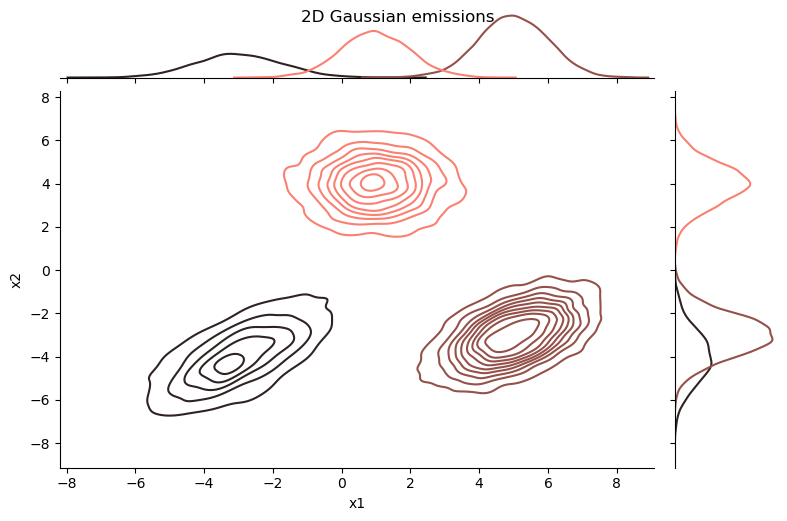

In [70]:
g = sns.jointplot(data=obs, x=obs[:, 0], y=obs[:, 1], hue=distr, kind='kde', palette='dark:salmon_r')
#.ax_marg_x.remove()
#g.ax_marg_y.remove()
g.ax_joint.legend_.remove()
g.set_axis_labels(xlabel='x1', ylabel='x2')
g.fig.suptitle('2D Gaussian emissions')
g.fig.set_figwidth(8.0)
g.fig.set_figheight(5.0)